# Feature Engineering, Decision Tree Pruning and Hyperparameter Tuning

### The Data
We will be using the dataset <em>incidents.csv</em>. 

This dataset contains 5000 cases and 13 features, including:

- city_name
- magnitude_of_delay
- delay_in_seconds
- affected_roads
- record_date
- luminosity
- avg_temperature
- avg_atm_pressure
- avg_humidity
- avg_wind_speed
- avg_precipitation
- avg_rain
- incidents

## Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

We'll use the built in hotel bookings dataset from Scikit Learn. We can get with the load function:

In [56]:
data = pd.read_csv('incidents.csv')

In [57]:
data.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           2972 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [59]:
data.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

## 1. Missing Values

<Axes: >

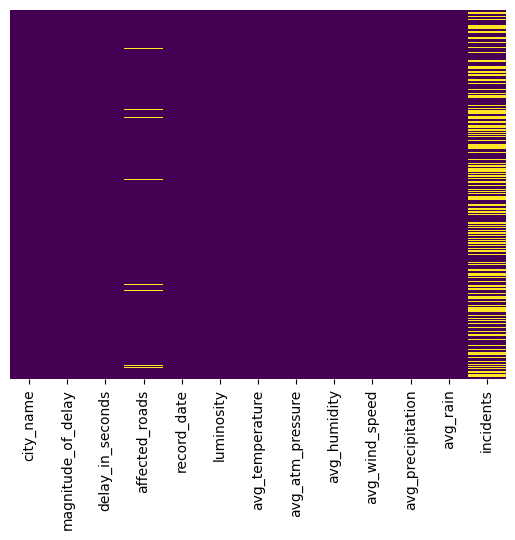

In [60]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
data.isnull().sum()

city_name                0
magnitude_of_delay       0
delay_in_seconds         0
affected_roads          85
record_date              0
luminosity               0
avg_temperature          0
avg_atm_pressure         0
avg_humidity             0
avg_wind_speed           0
avg_precipitation        0
avg_rain                 0
incidents             2028
dtype: int64

### - Drop or fill
Let's verify how the data is presented in the feature <em>affected_roads</em>

In [62]:
data['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [63]:
data[data['affected_roads'].isnull()]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
29,Guimaraes,UNDEFINED,64,NaN,2021-01-22 09:00,LIGHT,8.0,1012.0,91.0,4.0,0.0,Sem Chuva,Medium
76,Guimaraes,UNDEFINED,223,NaN,2021-01-29 08:00,LIGHT,11.0,1022.0,92.0,1.0,0.0,Sem Chuva,High
79,Guimaraes,MAJOR,80,NaN,2021-12-24 21:00,DARK,11.0,1004.0,92.0,0.0,0.0,Sem Chuva,NaN
91,Guimaraes,UNDEFINED,52,NaN,2021-03-02 13:00,LIGHT,13.0,1024.0,78.0,2.0,0.0,Sem Chuva,Low
109,Guimaraes,UNDEFINED,139,NaN,2021-12-27 13:00,LIGHT,15.0,1014.0,88.0,5.0,0.0,Sem Chuva,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,Guimaraes,MAJOR,298,NaN,2021-12-22 13:00,LIGHT,16.0,1015.0,71.0,3.0,0.0,Sem Chuva,NaN
4811,Guimaraes,UNDEFINED,96,NaN,2021-03-11 15:00,LIGHT,13.0,1025.0,89.0,3.0,0.0,chuva fraca,Medium
4838,Guimaraes,UNDEFINED,36,NaN,2021-03-10 13:00,LIGHT,14.0,1025.0,65.0,2.0,0.0,Sem Chuva,Low
4854,Guimaraes,UNDEFINED,233,NaN,2021-01-29 20:00,DARK,11.0,1017.0,92.0,1.0,0.0,Sem Chuva,High


Copy of the data to experiment the options

In [64]:
data_m1 = data.copy()
data_m2 = data.copy()

#### a) Drop

In [65]:
data_m1.drop(['affected_roads'],axis = 1, inplace= True)
data_m1.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


#### b) Fill with zero

In [66]:
data_m2.fillna(0,inplace = True)
data_m2.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,0
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,0
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


We need to choose one of the options to keep going. We will choose to drop the column since it does not bring added value to our goal.

In [67]:
data.drop(['affected_roads'], axis=1 , inplace= True)

Let's see if there are still missing values

<Axes: >

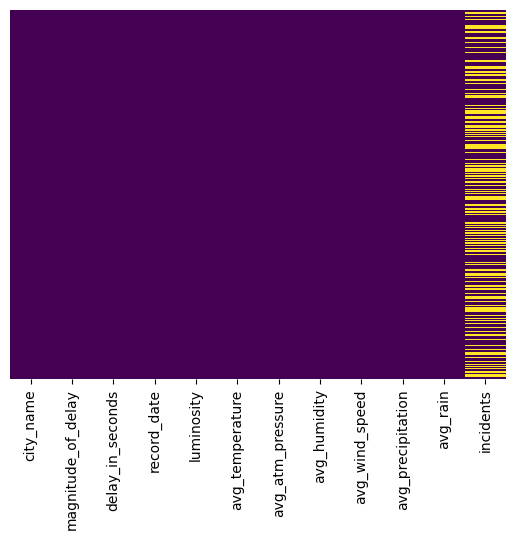

In [68]:
sns.heatmap(data.isnull(),yticklabels= False, cbar = False, cmap = 'viridis')

In [69]:
data.isnull().sum()

city_name                0
magnitude_of_delay       0
delay_in_seconds         0
record_date              0
luminosity               0
avg_temperature          0
avg_atm_pressure         0
avg_humidity             0
avg_wind_speed           0
avg_precipitation        0
avg_rain                 0
incidents             2028
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_precipitation   5000 non-null   float64
 10  avg_rain            5000 non-null   object 
 11  incidents           2972 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 468.9+ KB


In [71]:
data.head()

,city_name,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,NaN
1,Guimaraes,UNDEFINED,385,2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,NaN
2,Guimaraes,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


There are features that are of the type <em>object</em>: <em>city_name</em>, <em>magnitude_of_delay</em>, <em>record_date</em>, <em>luminosity</em>, <em>avg_rain</em> and <em>incidents</em>.

Let's see how many different values each feature has.

In [72]:
data.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                4
dtype: int64

The features <em>city_name</em> and <em>avg_precipitation</em> have only one value. We will start with <em>avg_precipitation</em>:

In [73]:
data['avg_precipitation'].nunique()

1

In [74]:
data['avg_precipitation'].describe()

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: avg_precipitation, dtype: float64

Since 0 is the unique value of <em>avg_precipitation</em> and all entries have the same value, we will drop this feature.

In [75]:
data.drop(['avg_precipitation'], axis = 1, inplace = True)

## 2. Handling categoric data

Feature <em>city_name</em>

In [76]:
data['city_name'] .head()

0    Guimaraes
1    Guimaraes
2    Guimaraes
3    Guimaraes
4    Guimaraes
Name: city_name, dtype: object

The unique value of <em>city_name</em> is <em>Guimarães</em>. We can drop this feature as well.

In [77]:
data.drop('city_name',axis=1 , inplace=True)
data.dropna(inplace=True)

Let's see the feature <em>incidents</em>:

In [78]:
print(data['incidents'].value_counts())

incidents
High         1073
Low           718
Very_High     603
Medium        578
Name: count, dtype: int64


In [79]:
print(data['incidents'].value_counts().count())

4


Let's create a barplot of <em>Frequency Distribution of Incidents</em> (style="darkgrid", fontsize=12)

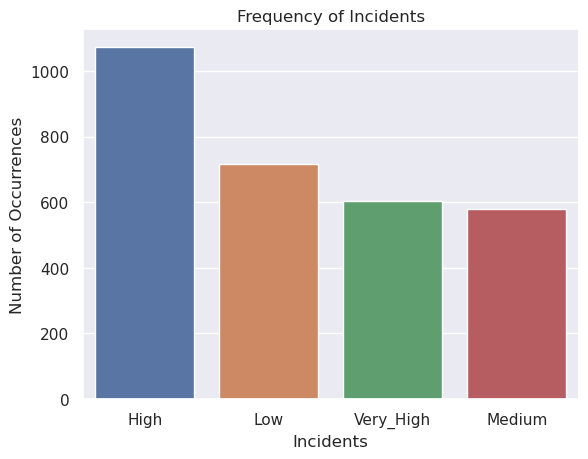

In [80]:
incidents_count = data['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency of Incidents')
plt.ylabel('Number of Occurrences',fontsize = 12)
plt.xlabel('Incidents',fontsize = 12)
plt.show()

Let's create a pie plot of <em>Category Distribution of Incidents</em>

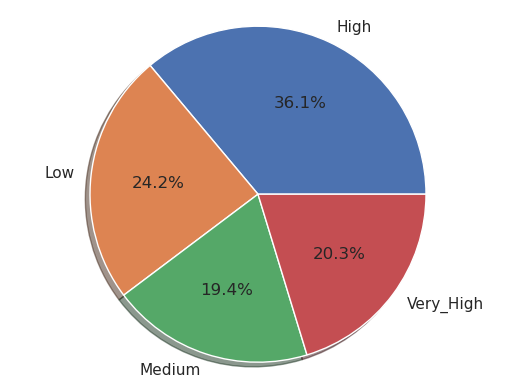

In [81]:
labels = data['incidents'].astype('category').cat.categories.tolist()
counts = data['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes, labels = labels,autopct='%1.1f%%',shadow = True)
ax1.axis('equal')
plt.show()

We have several options how to deal with qualitative data:

#### a) Replace Values

Again, we are using data copies to experiment all options.

In [82]:
data_r1=data.copy()
data_r1.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
2,UNDEFINED,69,2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low


We need to create a dictionary assigning the string to a numeric value:

None - 0, Low - 1, Medium - 2, High - 3, Very_High - 4

In [83]:
replace_map = {'incidents':{'None':0,'Low':1,'Medium':2,'High':3,'Very_High':4}}

Then we create the labels and associate:

In [ ]:
labels = data_r1['incidents'].astype('category').cat.categories.tolist()


Now we need to replace with the new values:

Done! Now we can see that the type of values are <em>int64</em>:

#### b) Label encoding

Similar to the previous examples, each string will be assigned a number. Instead of replacing the values under the column <em>incidents</em>, we are going to create a new colum to each created label.

To complete the process, it is needed to replicate for each label and then drop the column <em>incidents</em>.

Let's see another way to label encoding. This uses the <em>LabelEncoder</em> from <em>sklearn</em>.

It creates a new column, <em>incidents_code</em>, with the labels assigned to feature <em>incidents</em>. The numeric values were assigned randomly, being the crescent order not apllicable to the meaning of the qualifying words.

#### c) One-Hot encoding

This alternative uses <em>LabelBinarizer</em> of <em>sklearn</em> and creates a matrix with bits regarding each label.

#### d) Binary Encoding
Similar to the previous technique, it creates a matrix of the status of the values, but this time with binary values. See the comparison between techniques below:

|   Level   | "Decimal encoding" | Binary encoding | One-Hot encoding |
| :-------: | :----------------: | :-------------: | :--------------: |
| None      |         0          |       000       |      000001      |
| Low       |         1          |       001       |      000010      |
| Medium    |         2          |       010       |      000100      |
| High      |         3          |       011       |      001000      |
| Very_High |         4          |       100       |      010000      |

For this technique it is needed to have the <em>category_encoders</em> installed:
<code>!pip install category_encoders</code>

#### e) Backward difference encoding
The values are normalized in the range of -1 to 1.

#### f) Factorize
This technique encodes the object as an enumerated type or categorical variable.

We will choose the factorize technique to keep going.

Regarding the features <em>magnitude_delay</em>, <em>luminosity</em> and <em>avg_rain</em>, we will factorize for now.

## 3. Handling dates

Datetime Properties and Methods (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

We are going to convert the dates from <em>object</em> to <em>datetime</em>, specifying the format we want:

We can extract parts of the date and create newm columns with that:

Since the year and the minute have only one value, we will drop it.

Other functions to deal with dates

We can use <em>datetime.today</em> and fetch the actual date.

It can be measured the time elapsed between the dates on the dataset and today.

And we can also separate each component of the date by day, month, hour, time, etc.

Now we need to choose how to deal with the <em>record_date</em>.

There are other features that need to be worked on, but it's up to you now!

# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

Let's analyze through a heatmap

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship.

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

Jointplot <em>Luminosity vs. Avg_temperature</em>

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>

# Train Test Split

Split the data into a training set and a testing set.

# Train a Model

Now it's time to train a Decision Tree Classifier. 

**Call the DecisionTreeClassifier() model from sklearn and fit the model to the training data.**

#### 1. Plot the resultant tree (plot_tree) and save it as figure (.png)

#### 2. Using export_text to represent the tree. Save it in a log file

# Model Evaluation

Now let's get predictions from the model and create a confusion matrix and a classification report.

Let's see if we can tune the parameters to try to get even better. It is unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## Gridsearch Practice

- Finding the right parameters is a tricky task
- The idea of creating a 'grid' of parameters and trying out all the possible combinations is called a Gridsearch
    - This method is common enough that Scikit-learn has this functionality built in with GridSearchCV (CV stands for Cross-Validation)
    - GridSearchCV takes a dictionary that describes the parameters that should be tried and the model to train
    - The grid of parameters is defined as a dictionary where the keys are the parameters and the values are the settings to be tested

- GridSearchCV is a meta-estimator
- It takes an estimator like DTC and creates a new estimator that behaves exactly the same - in this case, like a classifier.
- You should add <em>refit=True</em> and choose verbose to whatever number you want (verbose means the text output describing the process).

What does fit do: 
- Runs the same loop with cross-validation to find the best parameter combination 
- Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation) to built a single new model using the best parameter setting

Now let's take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?

## Pruning

Pruning of the DT is done by replacing a whole subtree by a leaf node.
If the expected error rate in the subtree is greater thant the single leaf,  it is made the replacement.

When to apply in Decision Trees:
- If the node gets very small, do not continue to split
- Minimum error (cross-validation) pruning without early stopping is a good technique
- Build a full-depth tree and work backward by applying a statistical test during each stage
- Prune an interior node and raise the sub-tree beneath it up one level

#### Best Depth Tree

You can inspect the best parameters found by GridSearchCV in the **best_params_ attribute**, and the best estimator in the **best\_estimator_ attribute**:

#### 1. Plot the tree (dpi=1000)

#### 2. Evaluate the model with confusion matrix  and classification report

#### Pruned Tree

#### 1. Plot the tree

#### 2. Evaluate the model with confusion matrix  and classification report